import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data upload from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#upload data in pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Datasets/customer_segmentation.csv')
#

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


data analysis

In [5]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [10]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [11]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [12]:
df["Age"] = 2025 - df["Year_Birth"]

In [13]:
df["Age"]

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [15]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [16]:
df["Total_Children"]

,Total_Children
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [18]:
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [19]:
df["Total_Spending"] = df[spend_cols].sum(axis=1)

In [20]:
df["Total_Spending"]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [21]:
#df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df["Customer_Since"] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days


In [22]:
df["Customer_Since"]

,Customer_Since
0,4814
1,4264
2,4463
3,4290
4,4312
...,...
2235,4532
2236,4170
2237,4306
2238,4307


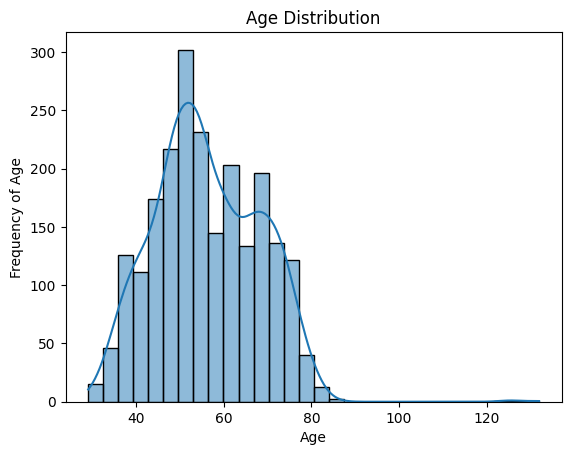

In [23]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency of Age")
plt.show()

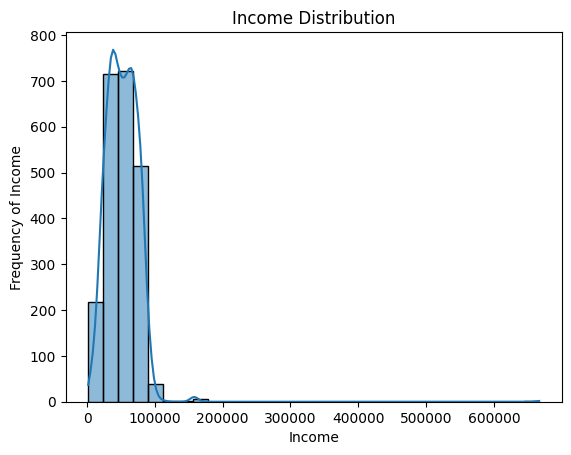

In [24]:
#income distribution
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency of Income")
plt.show()

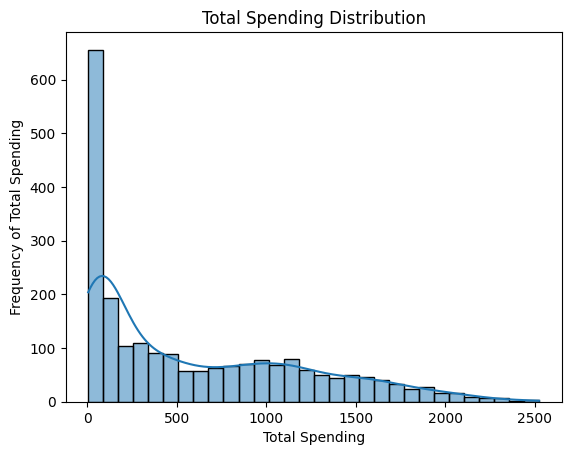

In [ ]:
#total spending distribution
sns.histplot(df['Total_Spending'], bins=30, kde=True)
plt.title("Total Spending Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Frequency of Total Spending")
plt.show()

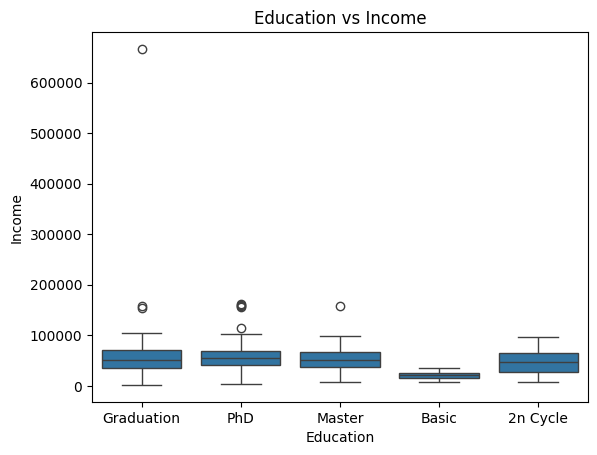

In [ ]:
#boxplot education vs income
sns.boxplot(x='Education', y='Income', data=df)
plt.title("Education vs Income")
plt.xlabel("Education")
plt.ylabel("Income")
plt.show()

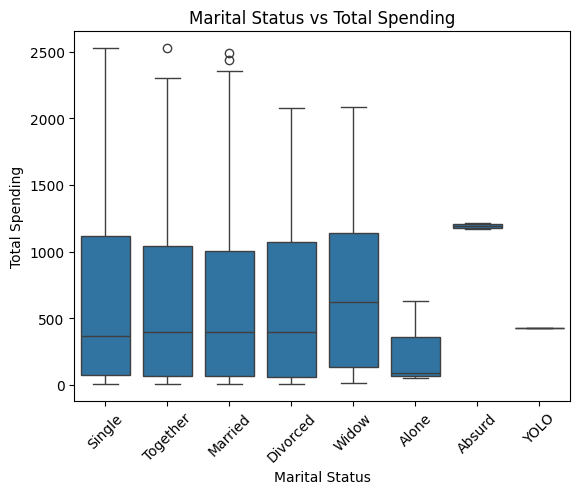

In [ ]:
#boxplot marital status and total spending
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df)
plt.xticks(rotation=45)
plt.title("Marital Status vs Total Spending")
plt.xlabel("Marital Status")
plt.ylabel("Total Spending")
plt.show()

In [25]:
#correlation analysis
corr = df[["Income","Age","Recency","Total_Spending","NumWebPurchases","NumStorePurchases"]].corr()

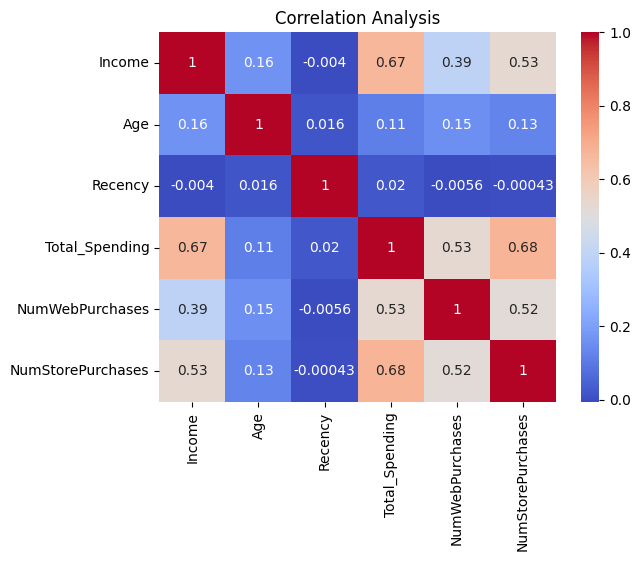

In [26]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Analysis")
plt.show()

In [27]:
pivot_income = df.pivot_table(index="Education", columns="Marital_Status", values="Income", aggfunc="mean")

In [28]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income By Education and marital Status')

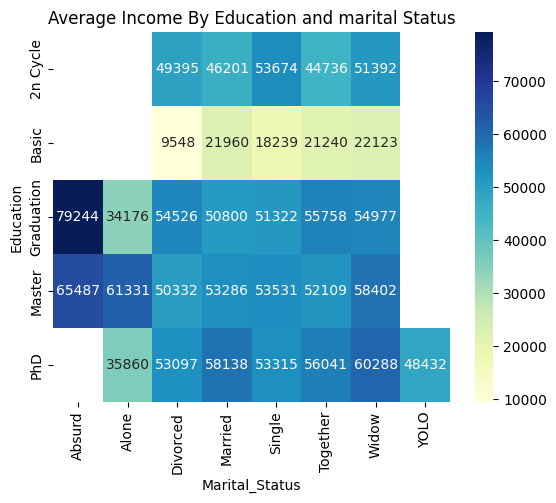

In [29]:
sns.heatmap(pivot_income, annot=True,fmt=".0f", cmap="YlGnBu")
plt.title("Average Income By Education and marital Status")

In [30]:
group1 = df.groupby("Education")["Total_Spending"].mean().sort_values(ascending=False)

In [ ]:
group1

,Total_Spending
Education,
PhD,676.733888
Graduation,621.686380
Master,609.767123
2n Cycle,494.930000
Basic,81.796296


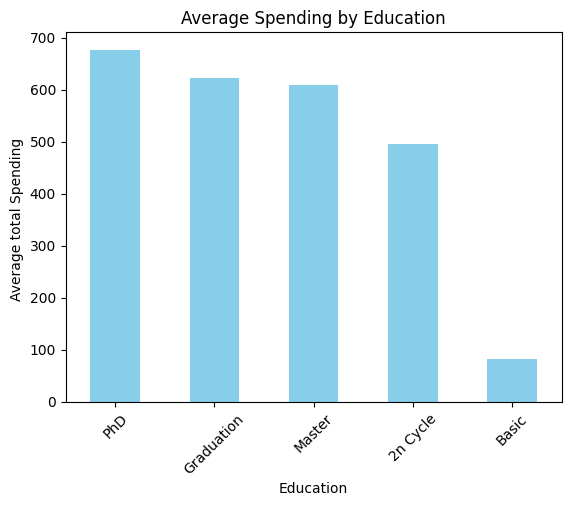

In [31]:
group1.plot(kind="bar", color="skyblue")
plt.title("Average Spending by Education")
plt.xlabel("Education")
plt.ylabel("Average total Spending " )
plt.xticks(rotation=45)
plt.show()

In [32]:
df["AcceptedAny"] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

In [33]:
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5])

In [34]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x: 1 if x>0 else 0)

In [35]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [36]:
group2

,AcceptedAny
Marital_Status,
Absurd,0.500000
YOLO,0.500000
Widow,0.342105
Alone,0.333333
Single,0.312102
Divorced,0.297414
Married,0.252042
Together,0.251309


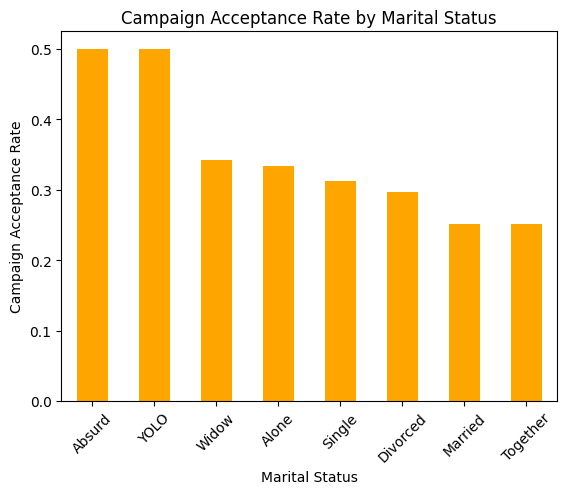

In [37]:
group2.plot(kind="bar", color="orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Campaign Acceptance Rate")
plt.xticks(rotation=45)
plt.show()

In [38]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [39]:
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

In [40]:
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

In [41]:
df["AgeGroup"]

,AgeGroup
0,60-69
1,70+
2,50-59
3,40-49
4,40-49
...,...
2235,50-59
2236,70+
2237,40-49
2238,60-69


In [42]:
group3 = df.groupby("AgeGroup")["Income"].mean()

/tmp/ipython-input-1140876350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


In [43]:
group3

,Income
AgeGroup,
18-29,46658.000000
30-39,46283.028302
40-49,49224.877034
50-59,50812.913303
60-69,56200.827887
70+,58944.316294


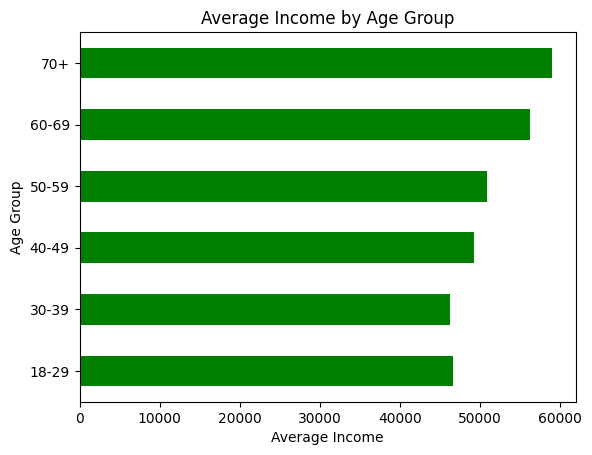

In [44]:
group3.plot(kind="barh", color="green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.ylabel("Age Group")
plt.show()

In [45]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4814,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4264,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4463,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4290,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4312,0,40-49


In [46]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [47]:
features = ["Age", "Income", "Total_Spending","NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Recency"]


In [48]:
X = df[features].copy()

In [ ]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


Data Preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
X_scaled = scaler.fit_transform(X)

In [51]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [52]:
from sklearn.cluster import KMeans


In [53]:
wcss = []

In [54]:
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state=5)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

In [55]:
wcss

[10218.620143748776,
 9007.786818672812,
 8239.30762352455,
 7665.81836663623,
 7262.972246528717,
 6844.51299708072,
 6287.168282468832,
 5854.155536235021]

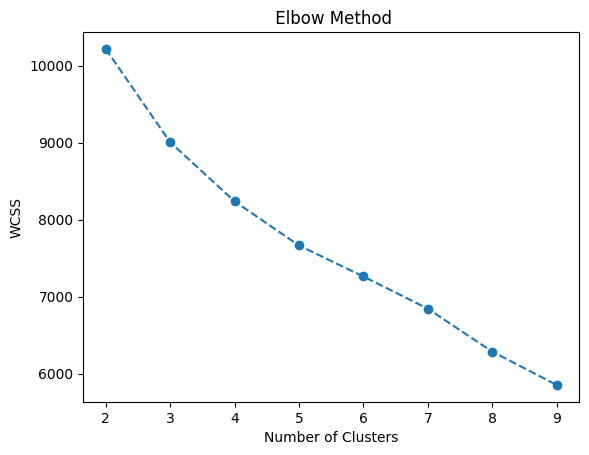

In [56]:
plt.plot(range(2,10), wcss, marker='o', linestyle='--')
plt.title(" Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [58]:
Kmeans = KMeans(n_clusters=6)
df["Cluster"] = Kmeans.fit_predict(X_scaled)

In [57]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4814,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4264,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4463,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4290,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4312,0,40-49


In [59]:
cluster_summary = df.groupby("Cluster")[features].mean()

In [60]:

cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,58.052055,56870.336986,779.402740,7.887671,6.786301,6.613699,50.117808
1,47.328788,30936.137879,93.960606,2.093939,3.034848,6.956061,43.163636
2,65.115294,41565.343529,146.703529,2.374118,3.800000,5.609412,58.585882
3,44.792982,74861.077193,1321.066667,4.719298,8.726316,2.712281,51.147368
4,67.363229,80893.488789,1259.591928,4.107623,6.663677,2.197309,60.977578
5,64.364341,68079.298450,1081.554264,5.899225,10.802326,4.399225,33.941860


In [61]:
df['Cluster'].value_counts()

,count
Cluster,
1,660
2,425
0,365
3,285
5,258
4,223


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_data[:,0], pca_data[:,1]

In [63]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]])

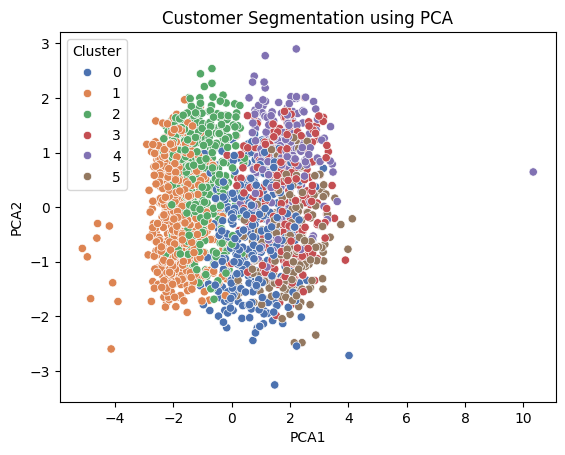

In [64]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="deep")
plt.title("Customer Segmentation using PCA")
plt.show()

In [65]:
import pickle
#Save the trained pipeline using pickle

pickle_model_path = "model.pkl"
with open(pickle_model_path, 'wb') as file:
    pickle.dump(Kmeans, file)


In [66]:
scaler_path = "scaler.pkl"
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)